In [1]:
import numpy as np
import pylab
import pandas as pd
from scipy.stats import linregress
from matplotlib.colors import LogNorm
from numpy import polyfit
from scipy.optimize import brenth
from scipy.interpolate import interp1d,UnivariateSpline
import seaborn as sns

%matplotlib inline

In [7]:
df = pd.read_csv('sizeDistri_mid_eq_7_9.txt', sep='\t', header=None)
df.columns = ['NSIM', 'NSIM2', 'NSUMO', 'LSIM', 'LSIM2', 'LSUMO', 'beta', 'gamma', 'step', 'sumoSizes', 'simSizes']
ratio_in_cluster = []
cluster_size = []
dimer = []
for idx in range(len(df)):
    distri = df.loc[idx].sumoSizes
    sizes = distri.split('[')[1].split(']')[0].split(' ')
    sizes = filter(None, sizes)
    sizes = pylab.array([int(ele) for ele in sizes])
    ratio_in_cluster.append(sum(sizes[sizes>10])/float(sum(sizes)))
    cluster_size.append(sum(np.square(sizes))/float(sum(sizes)))
    dimer.append(sum(sizes[sizes==1])/float(sum(sizes)))
df['RatioInCluster'] = ratio_in_cluster
df['ClusterSize'] = cluster_size
df = df[df.beta>8]

In [108]:
df_ctrl = pd.read_csv('sizeDistri_run9_ctrl.txt', sep='\t', header=None)
df_ctrl.columns = ['NSIM', 'NSUMO', 'LSIM', 'LSUMO', 'beta', 'gamma', 'step', 'sumoSizes', 'simSizes']
ratio_in_cluster = []
cluster_size = []
for idx in range(len(df_ctrl)):
    distri = df_ctrl.loc[idx].sumoSizes
    sizes = distri.split('[')[1].split(']')[0].split(' ')
    sizes = filter(None, sizes)
    sizes = pylab.array([int(ele) for ele in sizes])
    ratio_in_cluster.append(sum(sizes[sizes>10])/float(sum(sizes)))
#    cluster_size.append(sum(np.square(sizes))/(df.loc[idx].NSUMO*df.loc[idx].LSUMO))
    cluster_size.append(sum(np.square(sizes))/float(sum(sizes)))
df_ctrl['RatioInCluster'] = ratio_in_cluster
df_ctrl['ClusterSize'] = cluster_size


In [8]:
def get_proba(LSIM):
    meanval = df[df.LSIM==LSIM].groupby(['NSUMO'])['ClusterSize'].mean()    
    errors = df[df.LSIM==LSIM].groupby(['NSUMO'])['ClusterSize'].std()
    ddf = meanval.to_frame()
    errors = errors.to_frame()
    ddf['errors'] = errors['ClusterSize']
    ddf.reset_index(inplace=True)
    k = ddf.groupby(['NSUMO']).mean().reset_index()
    return k

In [17]:
def get_proba(LSIM):
    meanval = df[df.LSIM==LSIM].groupby(['NSUMO'])['RatioInCluster'].mean()    
    errors = df[df.LSIM==LSIM].groupby(['NSUMO'])['RatioInCluster'].std()
    ddf = meanval.to_frame()
    errors = errors.to_frame()
    ddf['errors'] = errors['RatioInCluster']
    #errors.reset_index(inplace=True)
    ddf.reset_index(inplace=True)
    k = ddf.groupby(['NSUMO']).mean().reset_index()
    return k

In [24]:
get_proba(7).RatioInCluster

0     1.000000
1     1.000000
2     0.999763
3     1.000000
4     1.000000
5     1.000000
6     0.999934
7     0.999732
8     1.000000
9     1.000000
10    1.000000
11    1.000000
12    1.000000
13    1.000000
14    1.000000
Name: RatioInCluster, dtype: float64

7
8
9


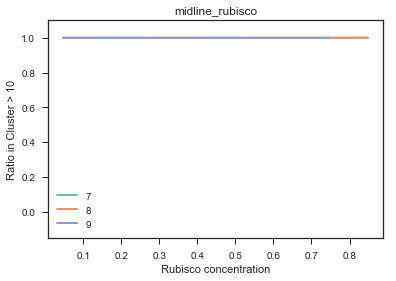

In [30]:
D = 50
LRubi = 8

for LEPYC in range(7,10):
    pylab.errorbar(get_proba(LEPYC).NSUMO*LRubi/(D**2),get_proba(LEPYC).RatioInCluster, fmt='-', linewidth=2,label=str(LEPYC))
    print(LEPYC)

sns.set_style('ticks')
sns.set_palette("Set2", 10)
#pylab.axes().set_aspect(1)
pylab.xlabel('Rubisco concentration')
pylab.ylabel('Ratio in Cluster > 10')
pylab.legend()
#pylab.semilogy()
#pylab.ylim(0,1000)
pylab.ylim(-0.15,1.1)
pylab.title('midline_rubisco')
pylab.savefig('/Users/guanhuahe/Desktop/jonikas_lab/Simulation_Rubisco/meet/0801_meet/midline_RatioInCluster(7-9).pdf')



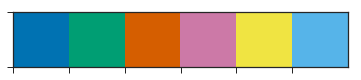

In [44]:
current_palette = sns.color_palette('colorblind')
sns.palplot(current_palette)

[]

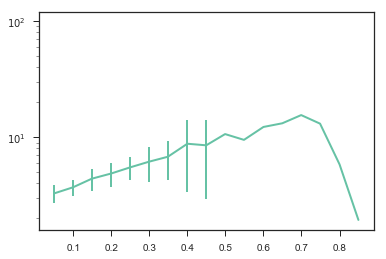

In [128]:
pylab.errorbar(get_proba(df,3).NSUMO*LRubi/(D**2),get_proba(df,3).ClusterSize/get_proba(df_ctrl,3).ClusterSize,yerr=get_proba(df,3).errors,fmt='-', linewidth=2,label='L=3')
pylab.semilogy()
pylab.ylim(0,5000)